In [2]:
%matplotlib inline

In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import data
import yfinance as yf
import warnings
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc


In [23]:
style.use('ggplot')

start = dt.datetime(2010, 1, 1)
end = dt.datetime.now()

In [24]:
df = data.get_data_yahoo("^DJI", start, end)
# df= web.DataReader('TSLA', 'yahoo', start, end)

In [25]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10604.969727,10430.690430,10430.690430,10583.959961,179780000,10583.959961
2010-01-05,10584.559570,10522.519531,10584.559570,10572.019531,188540000,10572.019531
2010-01-06,10594.990234,10546.549805,10564.719727,10573.679688,186040000,10573.679688
2010-01-07,10612.370117,10505.209961,10571.110352,10606.860352,217390000,10606.860352
2010-01-08,10619.400391,10554.330078,10606.400391,10618.190430,172710000,10618.190430


In [26]:
df.to_csv('DJ_2018_now')

In [27]:
df = pd.read_csv('DJ_2018_now', parse_dates=True, index_col=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10604.969727,10430.690430,10430.690430,10583.959961,179780000,10583.959961
2010-01-05,10584.559570,10522.519531,10584.559570,10572.019531,188540000,10572.019531
2010-01-06,10594.990234,10546.549805,10564.719727,10573.679688,186040000,10573.679688
2010-01-07,10612.370117,10505.209961,10571.110352,10606.860352,217390000,10606.860352
2010-01-08,10619.400391,10554.330078,10606.400391,10618.190430,172710000,10618.190430


C:\Users\UTENTE\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\UTENTE\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\UTENTE\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\UTENTE\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two mino

<Figure size 1080x1080 with 0 Axes>

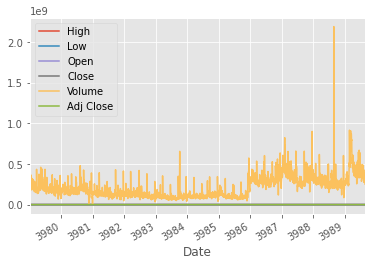

In [28]:
plt.figure(figsize=(15,15))
df.plot()
plt.show()

In [29]:
df[['Open', 'High']].head()

,Open,High
Date,,
2010-01-04,10430.690430,10604.969727
2010-01-05,10584.559570,10584.559570
2010-01-06,10564.719727,10594.990234
2010-01-07,10571.110352,10612.370117
2010-01-08,10606.400391,10619.400391


In [30]:
df["100ma"] = df["Adj Close"].rolling(window=100, min_periods=0).mean()

In [31]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-01-04,10604.969727,10430.690430,10430.690430,10583.959961,179780000,10583.959961,10583.959961
2010-01-05,10584.559570,10522.519531,10584.559570,10572.019531,188540000,10572.019531,10577.989746
2010-01-06,10594.990234,10546.549805,10564.719727,10573.679688,186040000,10573.679688,10576.553060
2010-01-07,10612.370117,10505.209961,10571.110352,10606.860352,217390000,10606.860352,10584.129883
2010-01-08,10619.400391,10554.330078,10606.400391,10618.190430,172710000,10618.190430,10590.941992


C:\Users\UTENTE\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\UTENTE\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<BarContainer object of 2681 artists>

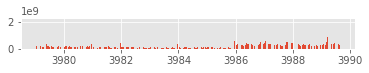

In [32]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1, sharex= ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

In [33]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

In [34]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()

<AxesSubplot:xlabel='Date'>

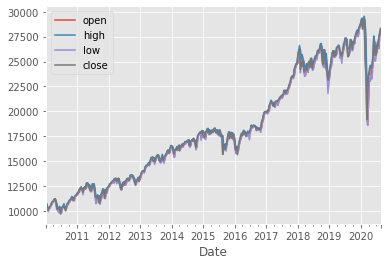

In [35]:
df_ohlc.plot()

In [36]:
df_volume = df['Volume'].resample('10D').sum()

In [37]:
print(df_ohlc.head())

                    open          high           low         close
Date                                                              
2010-01-04  10583.959961  10680.769531  10572.019531  10680.769531
2010-01-14  10710.549805  10725.429688  10172.980469  10172.980469
2010-01-24  10196.860352  10296.849609  10067.330078  10296.849609
2010-02-03  10270.549805  10270.549805   9908.389648  10099.139648
2010-02-13  10268.809570  10402.349609  10268.809570  10383.379883


In [38]:
df_ohlc = df_ohlc.reset_index()

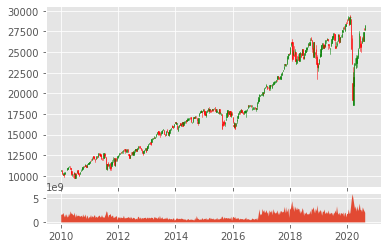

<Figure size 1080x1080 with 0 Axes>

In [39]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.figure(figsize=(15,15))
plt.show()

# S&P500 

In [40]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

save_sp500_tickers()

['MMM\n',
 'ABT\n',
 'ABBV\n',
 'ABMD\n',
 'ACN\n',
 'ATVI\n',
 'ADBE\n',
 'AMD\n',
 'AAP\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALXN\n',
 'ALGN\n',
 'ALLE\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'ABC\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'ANTM\n',
 'AON\n',
 'AOS\n',
 'APA\n',
 'AIV\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ADM\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'T\n',
 'ATO\n',
 'ADSK\n',
 'ADP\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'BKR\n',
 'BLL\n',
 'BAC\n',
 'BK\n',
 'BAX\n',
 'BDX\n',
 'BRK.B\n',
 'BBY\n',
 'BIO\n',
 'BIIB\n',
 'BLK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BF.B\n',
 'CHRW\n',
 'COG\n',
 'CDNS\n',
 'CPB\n',
 'COF\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CARR\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\n',
 'CNC\n',
 'CNP\n',
 'CTL\n',
 'CERN\

In [91]:
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests

style.use('ggplot')


def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[2:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

save_sp500_tickers()


['ABT\n',
 'ABBV\n',
 'ABMD\n',
 'ACN\n',
 'ATVI\n',
 'ADBE\n',
 'AMD\n',
 'AAP\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALXN\n',
 'ALGN\n',
 'ALLE\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'ABC\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'ANTM\n',
 'AON\n',
 'AOS\n',
 'APA\n',
 'AIV\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ADM\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'T\n',
 'ATO\n',
 'ADSK\n',
 'ADP\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'BKR\n',
 'BLL\n',
 'BAC\n',
 'BK\n',
 'BAX\n',
 'BDX\n',
 'BRK.B\n',
 'BBY\n',
 'BIO\n',
 'BIIB\n',
 'BLK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BF.B\n',
 'CHRW\n',
 'COG\n',
 'CDNS\n',
 'CPB\n',
 'COF\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CARR\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\n',
 'CNC\n',
 'CNP\n',
 'CTL\n',
 'CERN\n',
 'CF\n

In [92]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2015, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df = df.drop("Symbol", axis=1)
            df.to_csv(f'stock_dfs/{ticker}.csv')
        else:
            print(f'Already have {ticker}')




In [93]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv(f'stock_dfs/{ticker}.csv')
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

FileNotFoundError: [Errno 2] File b'stock_dfs/ABT\n.csv' does not exist: b'stock_dfs/ABT\n.csv'

In [94]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


visualize_data()

FileNotFoundError: [Errno 2] File b'sp500_joined_closes.csv' does not exist: b'sp500_joined_closes.csv'

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10604.969727,10430.690430,10430.690430,10583.959961,179780000,10583.959961
2010-01-05,10584.559570,10522.519531,10584.559570,10572.019531,188540000,10572.019531
2010-01-06,10594.990234,10546.549805,10564.719727,10573.679688,186040000,10573.679688
2010-01-07,10612.370117,10505.209961,10571.110352,10606.860352,217390000,10606.860352
2010-01-08,10619.400391,10554.330078,10606.400391,10618.190430,172710000,10618.190430


In [ ]:
def process_data_for_labels(ticker):
    hm_days = 7
    #df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    df = data.get_data_yahoo("^DJI", start, end, index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df

TypeError: process_data_for_labels() missing 1 required positional argument: 'ticker'

In [ ]:
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests
from collections import Counter

style.use('ggplot')


def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'morningstar', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    df.fillna(0, inplace=True)
    return tickers, df


def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0


def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    return X, y, df

In [ ]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:', Counter(predictions))
    print()
    print()
    return confidence


# examples of running:
do_ml('XOM')
do_ml('AAPL')
do_ml('ABT')

In [100]:
"""
This is a template algorithm on Quantopian for you to adapt and fill in.
"""
from quantopian.algorithm import attach_pipeline, pipeline_output
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.factors import AverageDollarVolume
 
def initialize(context):
    """
    Called once at the start of the algorithm.
    """   
    # Rebalance every day, 1 hour after market open.
    schedule_function(my_rebalance, date_rules.every_day(), time_rules.market_open(hours=1))
     
    # Record tracking variables at the end of each day.
    schedule_function(my_record_vars, date_rules.every_day(), time_rules.market_close())
     
    # Create our dynamic stock selector.
    attach_pipeline(make_pipeline(), 'my_pipeline')
         
def make_pipeline():
    """
    A function to create our dynamic stock selector (pipeline). Documentation on
    pipeline can be found here: https://www.quantopian.com/help#pipeline-title
    """
    
     
    # Create a dollar volume factor.
    dollar_volume = AverageDollarVolume(window_length=1)
 
    # Pick the top 1% of stocks ranked by dollar volume.
    high_dollar_volume = dollar_volume.percentile_between(99, 100)
     
    pipe = Pipeline(
        screen = high_dollar_volume,
        columns = {
            'dollar_volume': dollar_volume
        }
    )
    return pipe
 
def before_trading_start(context, data):
    """
    Called every day before market open.
    """
    context.output = pipeline_output('my_pipeline')
  
    # These are the securities that we are interested in trading each day.
    context.security_list = context.output.index
     
def my_assign_weights(context, data):
    """
    Assign weights to securities that we want to order.
    """
    pass
 
def my_rebalance(context,data):
    """
    Execute orders according to our schedule_function() timing. 
    """
    pass
 
def my_record_vars(context, data):
    """
    Plot variables at the end of each day.
    """
    pass
 
def handle_data(context,data):
    """
    Called every minute.
    """
    pass

ModuleNotFoundError: No module named 'quantopian'